In [1]:
#Download IMDB to the current folder
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
#To unzip 
!tar zxf aclImdb_v1.tar.gz

#Unsup is unlabeled and removed
!rm -rf aclImdb/train/unsup

#To show the IMDB Dataset Descriptions
!cat aclImdb/README

--2023-05-06 09:27:53--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  55.3MB/s    in 1.4s    

2023-05-06 09:27:55 (55.3 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

In [2]:
from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

#Displaying of the corresondence between 0, 1 of the label and the meaning
print(train_review.target_names)

['neg', 'pos']


In [3]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [4]:
mini_dataset = \
  ["This movie is very good.",
   "This film is a good",
   "Very Bad. Very, very bad."]

Bag of Words (BoW)

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')

bow = (vectorizer.fit_transform(mini_dataset)).toarray()

df = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


#N-Gram

In [6]:
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


#**Problem 1 - Scratch Implementation of Bag of Words (BoW)**

---


In [7]:
first_line = 'This movie is SOOOO funny!!!'.lower().replace('!', '').split()
second_line = 'What a movie! I never'.lower().replace('!', '').split()
third_line = 'best movie ever!!!!! this movie'.lower().replace('!', '').split()

In [8]:
gram_1_feature_names = first_line + second_line + third_line

In [9]:
import numpy as np
import pandas as pd

gram_1 = pd.DataFrame(np.zeros((3, len(set(gram_1_feature_names)))).astype('int'), columns=list(set(gram_1_feature_names)))

for i, ss in enumerate([first_line, second_line, third_line]):
    for s in set(ss):
        n = ss.count(s)
        gram_1[s][i] = n

print(gram_1)

   what  soooo  best  this  is  a  movie  never  i  ever  funny
0     0      1     0     1   1  0      1      0  0     0      1
1     1      0     0     0   0  1      1      1  1     0      0
2     0      0     1     1   0  0      2      0  0     1      0


In [10]:
gram_2_feature_names = []
gram_2_lines = []
for i, s in enumerate([first_line, second_line, third_line]):
  line = []
  for ss in range(len(s)-1):
    line.append(f'{s[ss]} {s[ss+1]}')
    gram_2_feature_names.append(f'{s[ss]} {s[ss+1]}')
  gram_2_lines.append(line)

In [11]:
gram_2 = pd.DataFrame(np.zeros((3, len(set(gram_2_feature_names)))).astype('int'), columns=list(set(gram_2_feature_names)))

for i, ss in enumerate(gram_2_lines):
    for s in ss:
        n = ss.count(s)
        gram_2[s][i] = n

gram_2

,best movie,movie i,movie ever,this movie,i never,a movie,what a,is soooo,soooo funny,ever this,movie is
0,0,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,1,1,0,0,0,0
2,1,0,1,1,0,0,0,0,0,1,0


TF * IDF

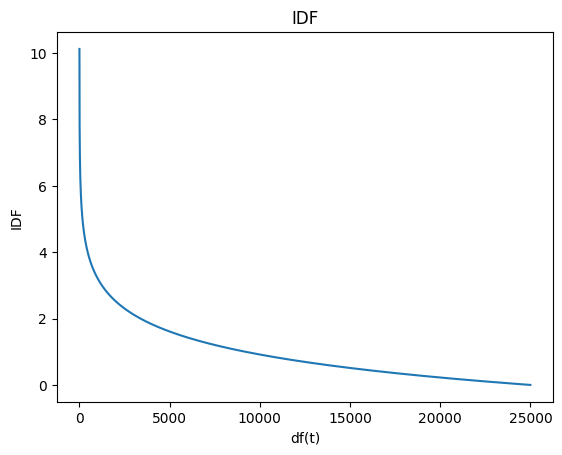

In [12]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

In [13]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


#Stop Words

In [14]:
#Downloading Stopwords for the First Time for this session
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) #'i', 'me', 'my', ...

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Maximum number of Vectors

In [15]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


#**Problem 2 - TF - IDF Calculation**


---



In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words= stop_words, max_features=10000)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.fit_transform(x_test)

#**Problem 3 - Learning Using the TF - IDF**


---



In [17]:
import lightgbm as lgb

lgb = lgb.LGBMClassifier().fit(X_train,y_train)
y_pred = lgb.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("{}".format(lgb.score(X_test, y_test)))
print("{}".format(precision_score(y_test,y_pred)))
print("{}".format(recall_score(y_test,y_pred)))
print("{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

0.49388
0.4958121202167844
0.72456
0.588747684207105
[[3290 9210]
 [3443 9057]]


#**Problem 4 - Scratch Monting of TF - IDF**


---


*   Standard Formula




In [19]:
tf = gram_1.copy()
idf = gram_1.copy()

for i in range(len(tf)):
    tf.iloc[i, :] = tf.iloc[i, :] / tf.iloc[i, :].sum()

for t in idf.columns:
    idf[t][:] = np.log(len(idf.columns) / idf[t].sum())

<ipython-input-19-1ad2f6401ef7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf[t][:] = np.log(len(idf.columns) / idf[t].sum())


In [20]:
tf

,what,soooo,best,this,is,a,movie,never,i,ever,funny
0,0.0,0.2,0.0,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.2
1,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.2,0.0,0.0
2,0.0,0.0,0.2,0.2,0.0,0.0,0.4,0.0,0.0,0.2,0.0


In [21]:
tf * idf

,what,soooo,best,this,is,a,movie,never,i,ever,funny
0,0.000000,0.479579,0.000000,0.34095,0.479579,0.000000,0.20232,0.000000,0.000000,0.000000,0.479579
1,0.479579,0.000000,0.000000,0.00000,0.000000,0.479579,0.20232,0.479579,0.479579,0.000000,0.000000
2,0.000000,0.000000,0.479579,0.34095,0.000000,0.000000,0.40464,0.000000,0.000000,0.479579,0.000000


*   **Scikit-learn formula**
___



In [22]:
tf_2 = gram_1.copy()
idf_2 = gram_1.copy()

for t in idf.columns:
    idf_2[t][:] = np.log((1 + len(idf_2.columns)) / (1 + idf[t].sum())) + 1

<ipython-input-22-0802a47f657c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_2[t][:] = np.log((1 + len(idf_2.columns)) / (1 + idf[t].sum())) + 1


In [23]:
tf_2 * idf_2

,what,soooo,best,this,is,a,movie,never,i,ever,funny
0,0.000000,1.381543,0.000000,1.674285,1.381543,0.000000,2.089949,0.000000,0.000000,0.000000,1.381543
1,1.381543,0.000000,0.000000,0.000000,0.000000,1.381543,2.089949,1.381543,1.381543,0.000000,0.000000
2,0.000000,0.000000,1.381543,1.674285,0.000000,0.000000,4.179898,0.000000,0.000000,1.381543,0.000000


#Word2Vector

---



In [24]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from gensim.models import Word2Vec

sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]

model = Word2Vec(sentences, min_count=1, vector_size=15)
print("List of vocabulary:{}".format(model.wv.index_to_key))
for vocab in model.wv.index_to_key:
    print("Vector of {} :\n{}".format(vocab, model.wv[vocab]))

List of vocabulary:['very', 'bad', 'good', 'is', 'this', 'a', 'film', 'movie']
Vector of very :
[-0.00357485  0.00157621  0.03402233  0.06006182 -0.06201966 -0.04744539
  0.04305915  0.05981992 -0.03343619 -0.02508914  0.04920336 -0.01022314
 -0.03024409  0.04369368 -0.03240107]
Vector of bad :
[-0.01210678  0.0191772   0.00661249 -0.05523477 -0.06299212  0.04874511
  0.03380175  0.04505129  0.00508577  0.04233927 -0.02270244 -0.00630934
  0.03845716 -0.05014425 -0.02624069]
Vector of good :
[-0.05007721 -0.00620028  0.06358746 -0.04879444 -0.01555846 -0.01291827
  0.05384958 -0.0395393   0.00030108 -0.03169156 -0.06402367  0.03338195
 -0.05839724 -0.02927884 -0.000234  ]
Vector of is :
[-0.00197456 -0.05107525  0.06409869  0.03321393  0.06155467 -0.05438646
  0.02997218 -0.02758068  0.00549694  0.05665782 -0.02974803  0.03011686
 -0.04524669 -0.02365674  0.06265712]
Vector of this :
[-0.01051768  0.00214248 -0.0276042  -0.05121792 -0.01005339  0.0164653
 -0.00592018  0.03689108 -0.018

In [26]:
model.wv.most_similar(positive="good", topn=3)

[('is', 0.37519174814224243),
 ('a', 0.23854228854179382),
 ('bad', 0.14096243679523468)]

#Visualizing the positional relationship of each word

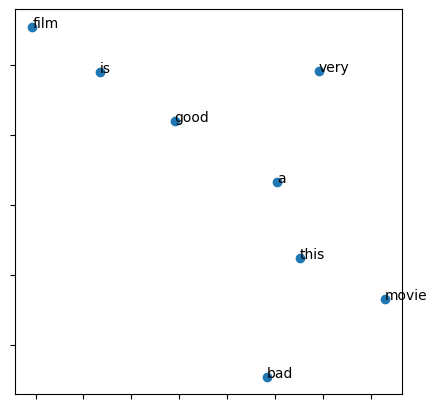

In [27]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
vocabs = model.wv.index_to_key
tsne_model = TSNE(perplexity=1, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model.wv[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

Distributed Representation of IMDB movie review datasets

In [28]:
model_2 = Word2Vec(min_count=1, vector_size=10)
model_2.build_vocab(x_train)
model_2.train(x_train, total_examples=model_2.corpus_count, epochs=model_2.epochs)

(36013505, 165633705)

#Problem 5 - Corpus Pretreatment

In [29]:
with_url = 0
for i, s in enumerate(x_train):
    if 'www' in s:
      with_url = i
      print('before processing')
      print('--------')
      print(s)
      break

before processing
--------
I don't hand out "ones" often, but if there was ever a film that deserved this sort of attention, it's "Gas!" This is self-indulgent crap that reaches for some of the ambiance of M*A*S*H and falls completely flat on its face in the attempt.<br /><br />I see what Corman was going for - Malcolm Marmorstein and Elliott Gould tried to reproduce Gould's deathless role in the original movie version of M*A*S*H with a similar plot (in the movie "Whiffs" - look it up here in IMDb, http://www.imdb.com/title/tt0073891/ for more information).<br /><br />Marmorstein and Gould got closer to the brass ring with "Whiffs" than Corman did with "Gas!" but didn't quite get there. Neither one of those films even got close to the success of M*A*S*H.<br /><br />What's wrong with "Gas!"? What isn't? No one comes close to really acting at a level above junior high school theatrics. The production values stink. Someone else here mentioned the magically regenerating headlights on a get

In [30]:
import re
no_preprocessing = x_train[with_url]
after_preprocessing1 = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\'...]+', "", no_preprocessing)
after_preprocessing3 = re.sub(r"[^0-9a-zA-Z]", "", after_preprocessing1)
after_preprocessing = after_preprocessing3.lower()
print(after_preprocessing)

idonthandoutonesoftenbutiftherewaseverafilmthatdeservedthissortofattentionitsgasthisisselfindulgentcrapthatreachesforsomeoftheambianceofmashandfallscompletelyflatonitsfaceintheattemptbrbriseewhatcormanwasgoingformalcolmmarmorsteinandelliottgouldtriedtoreproducegouldsdeathlessroleintheoriginalmovieversionofmashwithasimilarplotinthemoviewhiffslookituphereinimdbformoreinformationbrbrmarmorsteinandgouldgotclosertothebrassringwithwhiffsthancormandidwithgasbutdidntquitegetthereneitheroneofthosefilmsevengotclosetothesuccessofmashbrbrwhatswrongwithgaswhatisntnoonecomesclosetoreallyactingatalevelabovejuniorhighschooltheatricstheproductionvaluesstinksomeoneelseherementionedthemagicallyregeneratingheadlightsonagetawaycarandtheresmoreofthatlackofattentiontodetailnothingworksthewayitssupposedtointhisfilmandnobodycaresbrbrgasactuallyputmetosleepitsnotasurecureforinsomniabutreallycloseonthecinematicsleepinductionscalegasfallssomewherebetweenlastyearatmarienbadandgeorgeclooneysremakeofsolariswhichitse

#Problem 6 - Learning Word2Vec

In [31]:
model = Word2Vec(min_count=1, vector_size=10)
model.build_vocab(after_preprocessing)
model.train(after_preprocessing, total_examples=model.corpus_count, epochs=model.epochs)

(1195, 7050)